## Import Data

In [59]:
import requests

url = "https://github.com/pddasig/Machine-Learning-Competition-2020/raw/master/Data3_1_2020.zip"
response = requests.get(url)
with open("Data3_1_2020.zip", "wb") as f:
    f.write(response.content)

Extract training data

In [60]:
# Extract training data

import zipfile
with zipfile.ZipFile('Data3_1_2020.zip', 'r') as zipf:
    zipf.extract('train.csv')

Import pandas

In [61]:
import pandas as pd

In [62]:
# load data from CSV file

logs = pd.read_csv('train.csv')
logs.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
0,-999.0,-999.0,41.4699,-999.0,-999.0,-999.0,-999.0,128.0737,319.0654
1,-999.0,-999.0,42.5053,-999.0,-999.0,-999.0,-999.0,127.8347,318.7825
2,-999.0,-999.0,43.1548,-999.0,-999.0,-999.0,-999.0,127.2307,317.3323
3,-999.0,-999.0,43.2410,-999.0,-999.0,-999.0,-999.0,126.2917,313.6486
4,-999.0,-999.0,40.3218,-999.0,-999.0,-999.0,-999.0,125.3985,307.8903


In [63]:
# data information
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30143 entries, 0 to 30142
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CAL     30143 non-null  float64
 1   CNC     30143 non-null  float64
 2   GR      30143 non-null  float64
 3   HRD     30143 non-null  float64
 4   HRM     30143 non-null  float64
 5   PE      30143 non-null  float64
 6   ZDEN    30143 non-null  float64
 7   DTC     30143 non-null  float64
 8   DTS     30143 non-null  float64
dtypes: float64(9)
memory usage: 2.1 MB


In [64]:
# data attributes
logs.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
count,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000
mean,-8.394576,-23.692615,38.959845,3.977690,1.547299,-17.446739,-20.229982,-54.891703,-9.737567
std,129.970219,157.142679,108.504554,365.112753,456.908969,149.083136,148.809506,372.858812,440.314119
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,8.058350,0.122800,17.248750,0.717700,0.712050,0.053100,2.226700,66.304350,118.534350
50%,8.625000,0.193600,36.821800,1.623000,1.628100,4.941500,2.432200,78.355100,137.689300
75%,9.048850,0.337150,58.346150,3.158300,3.280600,7.856650,2.551350,107.022500,182.973150
max,21.064200,3490.158200,1470.253400,10000.000000,60467.761700,28.106400,3.259700,155.980300,487.438400


## Attempt to predict shear sonic from compressional sonic

In [65]:
import numpy as np

# select two logs
two = logs.loc[:, ('DTC', 'DTS')]
# replace -999 with NaN
two.replace(-999, np.nan, inplace=True)
# drop rows with NaN
two.dropna(inplace=True)
# data information
two.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21304 entries, 0 to 30142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DTC     21304 non-null  float64
 1   DTS     21304 non-null  float64
dtypes: float64(2)
memory usage: 499.3 KB


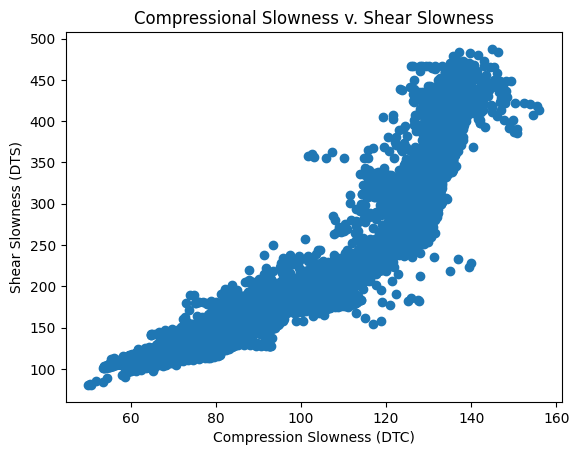

In [66]:
# display scatter plot to identify outliers

import matplotlib.pyplot as plt
plt.scatter(two.DTC, two.DTS)
plt.xlabel('Compression Slowness (DTC)')
plt.ylabel('Shear Slowness (DTS)')
plt.title('Compressional Slowness v. Shear Slowness')
plt.show()

Since there are no clear outliers to remove, but we recognize to different linear patterns, we can split the data and look at them separately. I will split the data at DTC = ~100 and then aim to do linear regression for each section of the data.

In [67]:
# remove anomalous density values
first2 = two.loc[(two.DTC < 110) & (two.DTS < 250)]

second2 = two.loc[(two.DTC > 110) & (two.DTS > 250)]


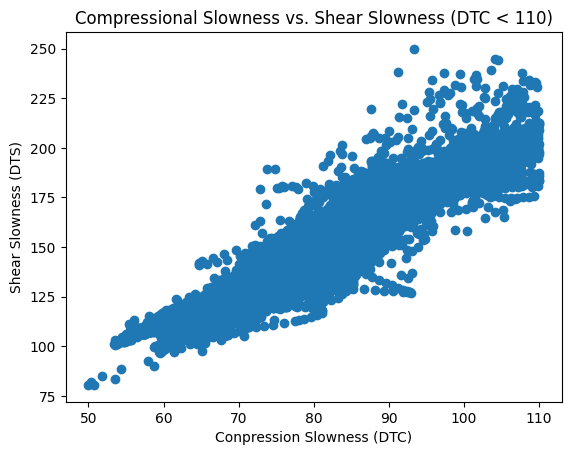

In [68]:
# scatterplot of first section

plt.scatter(first2.DTC, first2.DTS)
plt.xlabel('Conpression Slowness (DTC)')
plt.ylabel('Shear Slowness (DTS)')
plt.title('Compressional Slowness vs. Shear Slowness (DTC < 110)')
plt.show()

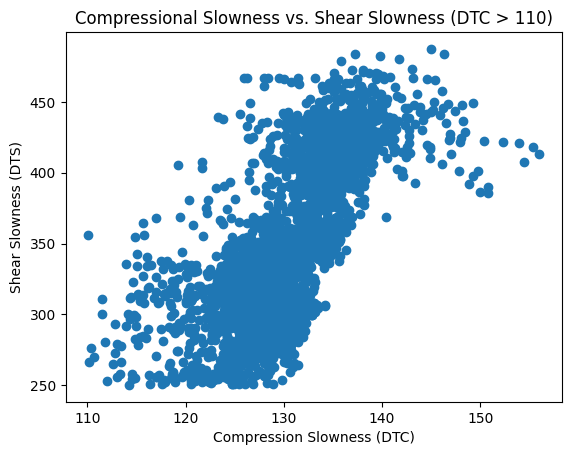

In [69]:
# scatterplot of second section

plt.scatter(second2.DTC, second2.DTS)
plt.xlabel('Compression Slowness (DTC)')
plt.ylabel('Shear Slowness (DTS)')
plt.title('Compressional Slowness vs. Shear Slowness (DTC > 110)')
plt.show()

## Divide all data into respective training and testing sets

In [70]:
# divide full dataset into training and testing
full_select = np.random.rand(len(two)) < 0.8
full_train = two[full_select]
full_test = two[~full_select]

In [71]:
# divide first portion of data into training and testing
select = np.random.rand(len(first2)) < 0.8
train = first2[select]
test = first2[~select]

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13278 entries, 8893 to 30140
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DTC     13278 non-null  float64
 1   DTS     13278 non-null  float64
dtypes: float64(2)
memory usage: 311.2 KB


In [72]:
# divide second portion of data into training and testing
select2 = np.random.rand(len(second2)) < 0.8
train2 = second2[select2]
test2 = second2[~select2]

train2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3349 entries, 0 to 17013
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DTC     3349 non-null   float64
 1   DTS     3349 non-null   float64
dtypes: float64(2)
memory usage: 78.5 KB


## Plot the training data for each division of the data - full, first portion, second portion.

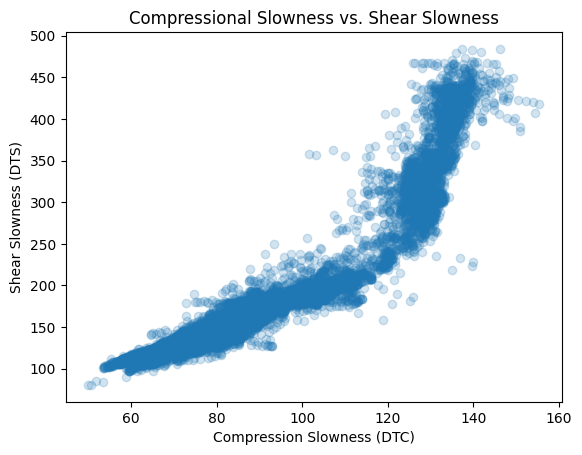

In [73]:
# plot the training data of full dataset

plt.scatter(full_train.DTC, full_train.DTS, alpha=0.2)
plt.xlabel('Compression Slowness (DTC)')
plt.ylabel('Shear Slowness (DTS)')
plt.title('Compressional Slowness vs. Shear Slowness')
plt.show()

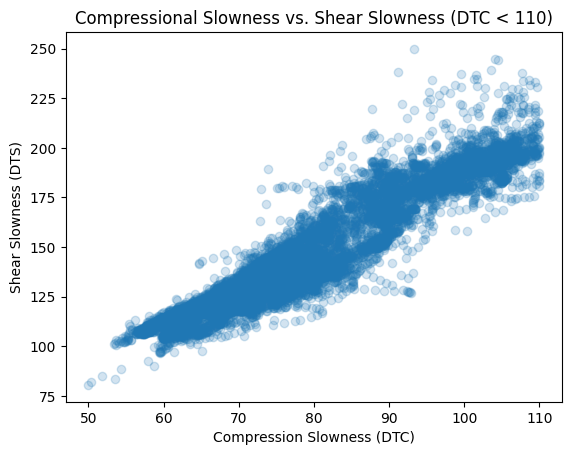

In [74]:
# plot the training data of first portion

plt.scatter(train.DTC, train.DTS, alpha=0.2)
plt.xlabel('Compression Slowness (DTC)')
plt.ylabel('Shear Slowness (DTS)')
plt.title('Compressional Slowness vs. Shear Slowness (DTC < 110)')
plt.show()

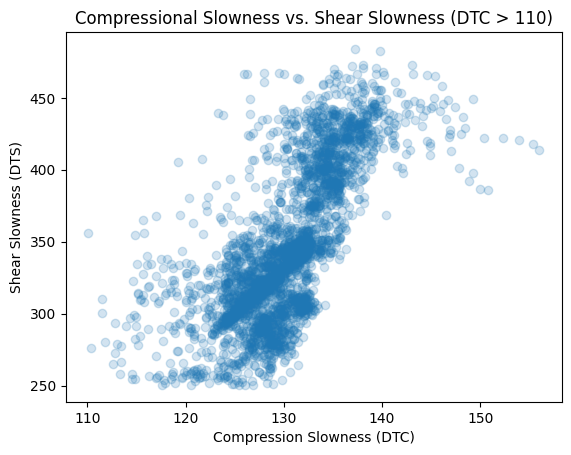

In [75]:
# plot the training data of second portion

plt.scatter(train2.DTC, train2.DTS, alpha=0.2)
plt.xlabel('Compression Slowness (DTC)')
plt.ylabel('Shear Slowness (DTS)')
plt.title('Compressional Slowness vs. Shear Slowness (DTC > 110)')
plt.show()

## Linear Regression

In [76]:
# create models
from sklearn import linear_model
full_linear = linear_model.LinearRegression()
linear = linear_model.LinearRegression()
linear2 = linear_model.LinearRegression()

#train model for full dataset
full_linear.fit(full_train[['DTC']], full_train['DTS'])
#train model for first portion
linear.fit(train[['DTC']], train['DTS'])
# train model without outliers
linear2.fit(train2[['DTC']], train2['DTS'])

LinearRegression()

Get Coefficients for Each Dataset

In [77]:
# regression coefficients for full dataset
print('Regression Coefficients for full dataset')
print('Intercept: ', full_linear.intercept_)
print('Coefficients: ', full_linear.coef_)
print('\n')
# regression coefficients first portion
print('Regression Coefficients for first portion')
print('Intercept: ', linear.intercept_)
print('Coefficients: ', linear.coef_)
print('\n')
# regression coefficients second portion
print('Regression Coefficients for second portion')
print('Intercept: ', linear2.intercept_)
print('Coefficients: ', linear2.coef_)

Regression Coefficients for full dataset
Intercept:  -116.1534588084748
Coefficients:  [3.37746884]


Regression Coefficients for first portion
Intercept:  -10.123909882383742
Coefficients:  [1.97689895]


Regression Coefficients for second portion
Intercept:  -594.7402757399307
Coefficients:  [7.22025385]


Plot each dataset using linear regression

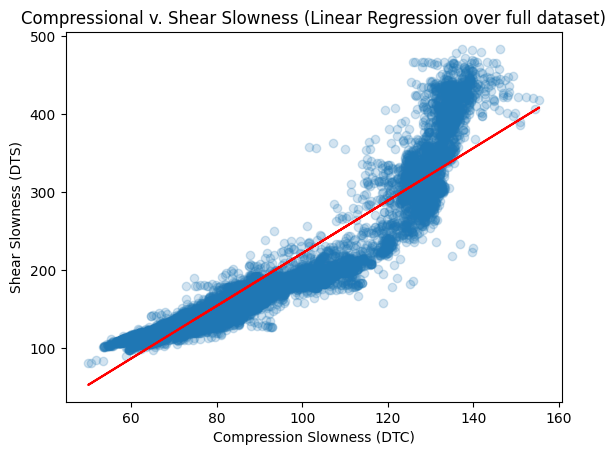

In [78]:
#plot training data (full dataset) with linear regression

plt.scatter(full_train.DTC, full_train.DTS, alpha=0.2)
plt.plot(full_train.DTC, full_linear.intercept_ +
        full_train.DTC*full_linear.coef_[0], '-r')
plt.xlabel('Compression Slowness (DTC)')
plt.ylabel('Shear Slowness (DTS)')
plt.title('Compressional v. Shear Slowness (Linear Regression over full dataset)')
plt.show()

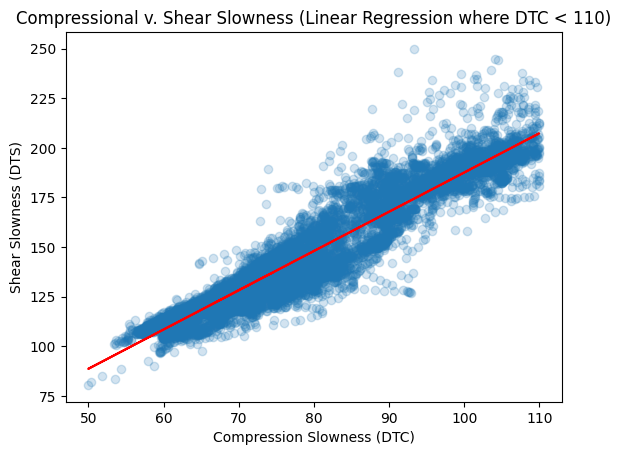

In [79]:
#plot training data (first portion dataset) with linear regression

plt.scatter(train.DTC, train.DTS, alpha=0.2)
plt.plot(train.DTC, linear.intercept_ +
        train.DTC*linear.coef_[0], '-r')
plt.xlabel('Compression Slowness (DTC)')
plt.ylabel('Shear Slowness (DTS)')
plt.title('Compressional v. Shear Slowness (Linear Regression where DTC < 110)')
plt.show()

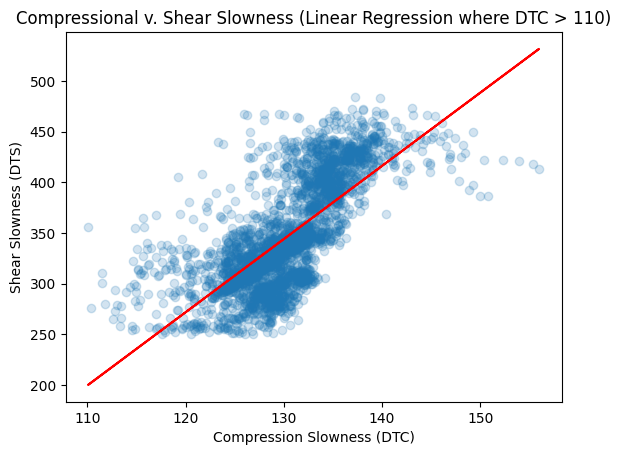

In [80]:
#plot training data (second portion dataset) with linear regression

plt.scatter(train2.DTC, train2.DTS, alpha=0.2)
plt.plot(train2.DTC, linear2.intercept_ +
        train2.DTC*linear2.coef_[0], '-r')
plt.xlabel('Compression Slowness (DTC)')
plt.ylabel('Shear Slowness (DTS)')
plt.title('Compressional v. Shear Slowness (Linear Regression where DTC > 110)')
plt.show()

After this initial graph, it looks like we could remove some outliers to get a more accurate regression line.
- So, I chose to look at the range of 120 < DTC < 140

In [81]:
# remove outliers from dataset
second_ref = second2.loc[(second2.DTC > 120) & (second2.DTC < 140)]

#divide into training and testing
# divide first portion of data into training and testing
select_ref = np.random.rand(len(second_ref)) < 0.8
train_ref = second_ref[select_ref]
test_ref = second_ref[~select_ref]

train_ref.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 1 to 17013
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DTC     3149 non-null   float64
 1   DTS     3149 non-null   float64
dtypes: float64(2)
memory usage: 73.8 KB


In [82]:
#create and fit the linear model for the refined dataset
linear_ref = linear_model.LinearRegression()
linear_ref.fit(train_ref[['DTC']], train_ref['DTS'])

#print the linear regression coefficients
print('Regression Coefficients for Refined Second Portion of Dataset')
print('Intercept: ', linear_ref.intercept_)
print('Coefficients: ', linear_ref.coef_)
print('\n')

Regression Coefficients for Refined Second Portion of Dataset
Intercept:  -851.1106602054144
Coefficients:  [9.18024729]




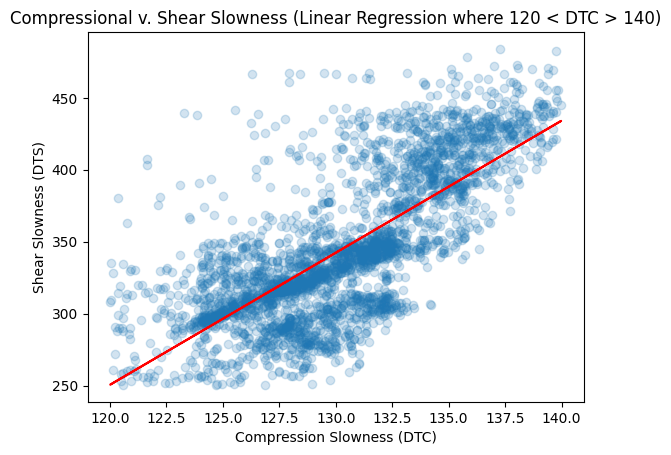

In [83]:
# plot the refined training data with linear regression

plt.scatter(train_ref.DTC, train_ref.DTS, alpha=0.2)
plt.plot(train_ref.DTC, linear_ref.intercept_ +
        train_ref.DTC*linear_ref.coef_[0], '-r')
plt.xlabel('Compression Slowness (DTC)')
plt.ylabel('Shear Slowness (DTS)')
plt.title('Compressional v. Shear Slowness (Linear Regression where 120 < DTC > 140)')
plt.show()

## Plot the two trend lines over the initial dataset

<ipython-input-84-ab54ad2f2422>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(train_ref.DTC, linear_ref.intercept_ +
<ipython-input-84-ab54ad2f2422>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(train.DTC, linear.intercept_ +


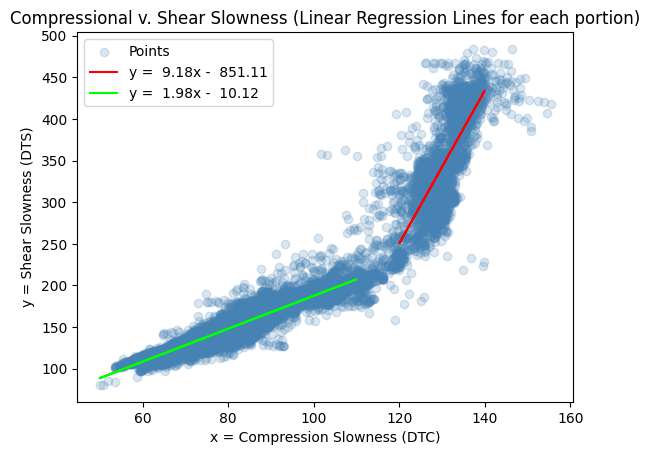

In [84]:
plt.scatter(full_train.DTC, full_train.DTS, alpha=0.2, color = 'steelblue')
plt.plot(train_ref.DTC, linear_ref.intercept_ +
        train_ref.DTC*linear_ref.coef_[0], '-r', color = 'red')
plt.plot(train.DTC, linear.intercept_ +
        train.DTC*linear.coef_[0], '-r', color = 'lime')
plt.xlabel('x = Compression Slowness (DTC)')
plt.ylabel('y = Shear Slowness (DTS)')
plt.title('Compressional v. Shear Slowness (Linear Regression Lines for each portion)')
plt.legend(labels= ['Points', f"y = {linear_ref.coef_[0]: .2f}x - {-linear_ref.intercept_: .2f}", f"y = {linear.coef_[0]: .2f}x - {-linear.intercept_: .2f}"], loc="upper left")
plt.show()

## Evaluate prediction error for full dataset, first portion, second portion, and refined second portion

In [85]:
# evaluate prediction error for full dataset

from sklearn.metrics import mean_squared_error
want_full = full_test['DTS']
get_full = full_linear.predict(full_test[['DTC']])

print('Linear Regression Prediction Error for Full Dataset')
print("RMS error: %.3f" % np.sqrt(np.mean((get_full-want_full)**2)))
print("RMS error: %.3f" % mean_squared_error(get_full, want_full,
                                             squared=False))
print('\n')

want = test['DTS']
get = linear.predict(test[['DTC']])

print('Linear Regression Prediction Error for First Portion of Dataset')
print("RMS error: %.3f" % np.sqrt(np.mean((get-want)**2)))
print("RMS error: %.3f" % mean_squared_error(get, want,
                                             squared=False))
print('\n')

want2 = test2['DTS']
get2 = linear2.predict(test2[['DTC']])

print('Linear Regression Prediction Error for Second Portion of Dataset')
print("RMS error: %.3f" % np.sqrt(np.mean((get2-want2)**2)))
print("RMS error: %.3f" % mean_squared_error(get2, want2,
                                             squared=False))

print('\n')

want_ref = test_ref['DTS']
get_ref = linear_ref.predict(test_ref[['DTC']])

print('Linear Regression Prediction Error for Refined Second Portion of Dataset')
print("RMS error: %.3f" % np.sqrt(np.mean((get_ref-want_ref)**2)))
print("RMS error: %.3f" % mean_squared_error(get_ref, want_ref,
                                             squared=False))

Linear Regression Prediction Error for Full Dataset
RMS error: 29.402
RMS error: 29.402


Linear Regression Prediction Error for First Portion of Dataset
RMS error: 8.699
RMS error: 8.699


Linear Regression Prediction Error for Second Portion of Dataset
RMS error: 36.646
RMS error: 36.646


Linear Regression Prediction Error for Refined Second Portion of Dataset
RMS error: 33.534
RMS error: 33.534


## Huber Regressor

In [86]:
# import the Huber Regressor

from sklearn.linear_model import HuberRegressor

In [87]:
# create and fit the Huber Regressor for full dataset
huber_full = HuberRegressor(epsilon=1.35)  # Adjust epsilon as needed
huber_full.fit(full_train[['DTC']], full_train['DTS'])

#create and fit the Huber Regressor for first portion
huber = HuberRegressor(epsilon=1.35) #Adjust epsilon as needed
huber.fit(train[['DTC']], train['DTS'])

#create and fit the Huber Regressor for first portion
huber2 = HuberRegressor(epsilon=1.35) #Adjust epsilon as needed
huber2.fit(train2[['DTC']], train2['DTS'])

HuberRegressor()

In [88]:
# Huber coefficients for full dataset
print('Huber Regressor Coefficients Full Dataset')
print('Intercept: ', huber_full.intercept_)
print('Coefficients: ', huber_full.coef_)
print('\n')
# Huber coefficients first portion
print('Huber Regressor Coefficients for First Portion of Dataset')
print('Intercept: ', huber.intercept_)
print('Coefficients: ', huber.coef_)
print('\n')
# Huber coefficients second portion
print('Huber Regressor Coefficients for Second Portion of Dataset')
print('Intercept: ', huber2.intercept_)
print('Coefficients: ', huber2.coef_)

Huber Regressor Coefficients Full Dataset
Intercept:  -89.67719723064621
Coefficients:  [3.04714027]


Huber Regressor Coefficients for First Portion of Dataset
Intercept:  -6.933091504445218
Coefficients:  [1.94059498]


Huber Regressor Coefficients for Second Portion of Dataset
Intercept:  -696.6688419891408
Coefficients:  [7.98942469]


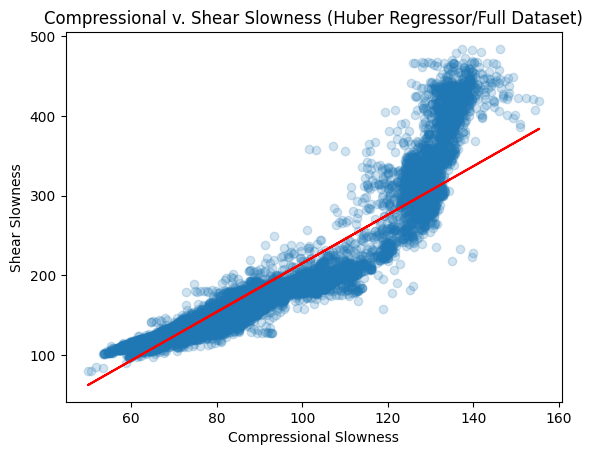

In [89]:
#plot training data for full dataset with huber regressor

plt.scatter(full_train.DTC, full_train.DTS, alpha=0.2)
plt.plot(full_train.DTC, huber_full.intercept_ +
        full_train.DTC*huber_full.coef_[0], '-r')
plt.xlabel('Compressional Slowness')
plt.ylabel('Shear Slowness')
plt.title('Compressional v. Shear Slowness (Huber Regressor/Full Dataset)')
plt.show()

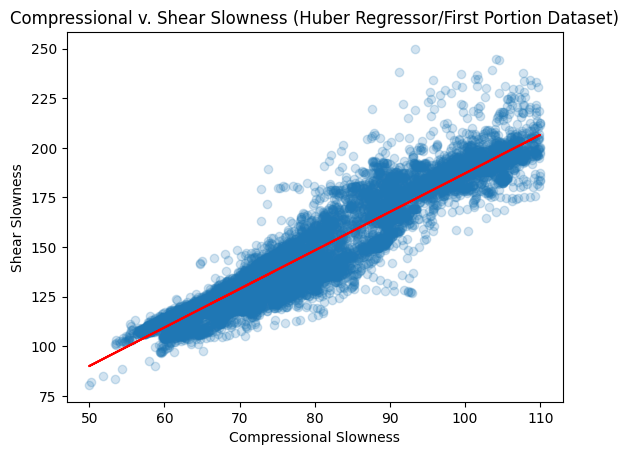

In [90]:
#plot training data for first portion of dataset with huber regressor

plt.scatter(train.DTC, train.DTS, alpha=0.2)
plt.plot(train.DTC, huber.intercept_ +
        train.DTC*huber.coef_[0], '-r')
plt.xlabel('Compressional Slowness')
plt.ylabel('Shear Slowness')
plt.title('Compressional v. Shear Slowness (Huber Regressor/First Portion Dataset)')
plt.show()

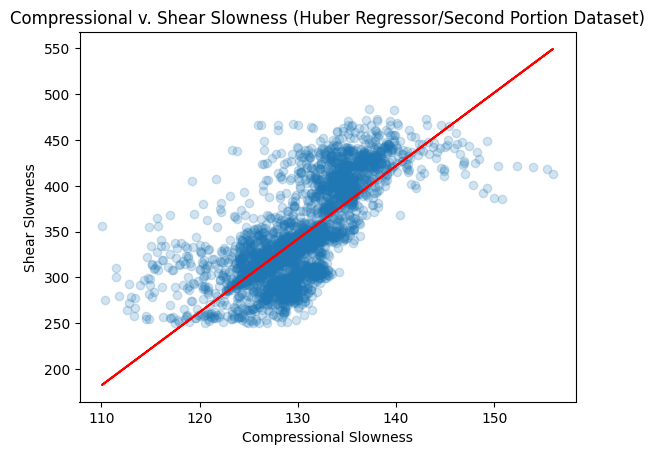

In [91]:
#plot training data for second portion of dataset with huber regressor

plt.scatter(train2.DTC, train2.DTS, alpha=0.2)
plt.plot(train2.DTC, huber2.intercept_ +
        train2.DTC*huber2.coef_[0], '-r')
plt.xlabel('Compressional Slowness')
plt.ylabel('Shear Slowness')
plt.title('Compressional v. Shear Slowness (Huber Regressor/Second Portion Dataset)')
plt.show()

In [92]:
#predict data using huber model
want_full = full_test['DTS']
get_full = huber_full.predict(full_test[['DTC']])

print('Huber Regressor Prediction Error for Full Dataset')
print("RMS error: %.3f" % np.sqrt(np.mean((get_full-want_full)**2)))
print("RMS error: %.3f" % mean_squared_error(get_full, want_full,
                                             squared=False))
print('\n')

#predict data using huber model (1st portion)
want = test['DTS']
get = huber.predict(test[['DTC']])

print('Huber Regressor Prediction Error for First Portion of Dataset')
print("RMS error: %.3f" % np.sqrt(np.mean((get-want)**2)))
print("RMS error: %.3f" % mean_squared_error(get, want,
                                             squared=False))
print('\n')

#predict data using huber model (2nd portion)
want2 = test2['DTS']
get2 = huber2.predict(test2[['DTC']])

print('Huber Regressor Prediction Error for Second Portion of Dataset')
print("RMS error: %.3f" % np.sqrt(np.mean((get2-want2)**2)))
print("RMS error: %.3f" % mean_squared_error(get2, want2,
                                             squared=False))

Huber Regressor Prediction Error for Full Dataset
RMS error: 30.728
RMS error: 30.728


Huber Regressor Prediction Error for First Portion of Dataset
RMS error: 8.729
RMS error: 8.729


Huber Regressor Prediction Error for Second Portion of Dataset
RMS error: 36.839
RMS error: 36.839


Since the RMSE is significantly higher for the second portion of the dataset, we can look at the RMSE for the refined second portion (excluding outliers)

In [93]:
# Look at the prediction error for the refined second portion of the dataset

#create and fit the Huber Regressor for refined second portion
huber_ref = HuberRegressor(epsilon=1.35) #Adjust epsilon as needed
huber_ref.fit(train_ref[['DTC']], train_ref['DTS'])

want_ref2 = test_ref['DTS']
get_ref2 = huber_ref.predict(test_ref[['DTC']])

print('Linear Regression Prediction Error for Refined Second Portion of Dataset')
print("RMS error: %.3f" % np.sqrt(np.mean((get_ref2-want_ref2)**2)))
print("RMS error: %.3f" % mean_squared_error(get_ref2, want_ref2,
                                             squared=False))

Linear Regression Prediction Error for Refined Second Portion of Dataset
RMS error: 33.667
RMS error: 33.667


## Neural Networks

In [94]:
#install packages

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [95]:
#introduce UTFE's "model_1" as "NN" with one output

NN = Sequential([
     Dense(24, activation='relu', input_shape=(1,)),
     Dense(12, activation='relu'),
     Dense(1),
     ])

NN2 = Sequential([
     Dense(24, activation='relu', input_shape=(1,)),
     Dense(12, activation='relu'),
     Dense(1),
     ])

## Plotting NN Model

In [96]:
from sklearn.preprocessing import RobustScaler

# scaling
X = train[['DTC']]
y = train[['DTS']]
X2 = train2[['DTC']]
y2 = train2[['DTS']]

# robust scaler from sklearn for first portion of data
xscaler = RobustScaler()
xscaler.fit(X)
Xs = xscaler.transform(X)

yscaler = RobustScaler()
yscaler.fit(y)
ys = yscaler.transform(y)

# scaling
X2 = train2[['DTC']]
y2 = train2[['DTS']]

# robust scaler from sklearn for second portion of data
xscaler2 = RobustScaler()
xscaler2.fit(X2)
Xs2 = xscaler2.transform(X2)

yscaler2 = RobustScaler()
yscaler2.fit(y2)
ys2 = yscaler2.transform(y2)

#scale the test set
X_test = test[['DTC']]
y_test = test[['DTS']]
X_test2 = test2[['DTC']]
y_test2 = test2[['DTS']]

# robust scaler from sklearn for first portion of data
xtscaler = RobustScaler()
xtscaler.fit(X_test)
Xs_test = xtscaler.transform(X_test)

ytscaler = RobustScaler()
ytscaler.fit(y_test)
ys_test = ytscaler.transform(y_test)

# robust scaler from sklearn for second portion of data
xtscaler2 = RobustScaler()
xtscaler2.fit(X_test2)
Xs2_test = xtscaler2.transform(X_test2)

ytscaler2 = RobustScaler()
ytscaler2.fit(y_test2)
ys2_test = ytscaler2.transform(y_test2)

In [97]:
import math

#compile model

NN.compile(optimizer = 'adam', loss = 'mse')
NN2.compile(optimizer = 'rmsprop', loss = 'mse')

#fit the model
neuralnet = NN.fit(Xs, ys)
neuralnet2 = NN2.fit(Xs2, ys2)

#make predictions

train_pred = yscaler.inverse_transform(NN.predict(Xs))
test_pred = ytscaler.inverse_transform(NN.predict(Xs_test))

train_pred2 = yscaler2.inverse_transform(NN.predict(Xs2))
test_pred2 = ytscaler2.inverse_transform(NN.predict(Xs2_test))

# calculate rmse

test_rmse = math.sqrt(mean_squared_error(test[['DTS']], test_pred))
test_rmse2 = math.sqrt(mean_squared_error(test2[['DTS']], test_pred2))

print('\nNeural Net Prediction Error for Data for first portion of data')
print("RMSE:", test_rmse)
print('\nNeural Net Prediction Error for Data for second portion of data')
print("RMSE:", test_rmse2)



27/27 [==============================] - 0s 2ms/step

Neural Net Prediction Error for Data for first portion of data
RMSE: 8.463051496776881

Neural Net Prediction Error for Data for second portion of data
RMSE: 39.733090962579475


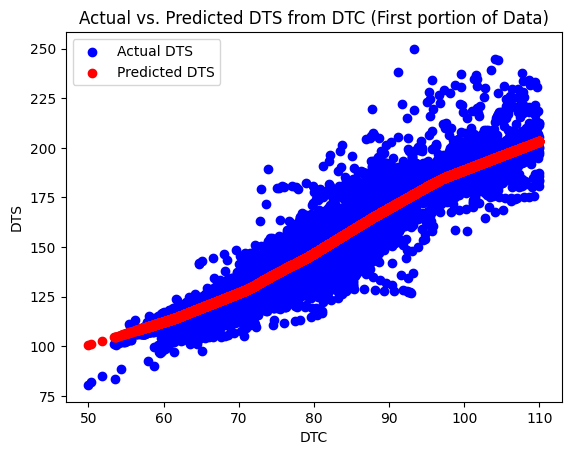

In [98]:
# plot training data for first portion of data using NN
plt.scatter(X, y, label = "Actual DTS", color = "blue")

# plot predicted data from first portion of data, predicted using NN model
plt.scatter(X, train_pred, label = "Predicted DTS", color = "red")
plt.xlabel("DTC")
plt.ylabel("DTS")
plt.title("Actual vs. Predicted DTS from DTC (First portion of Data)")
plt.legend()

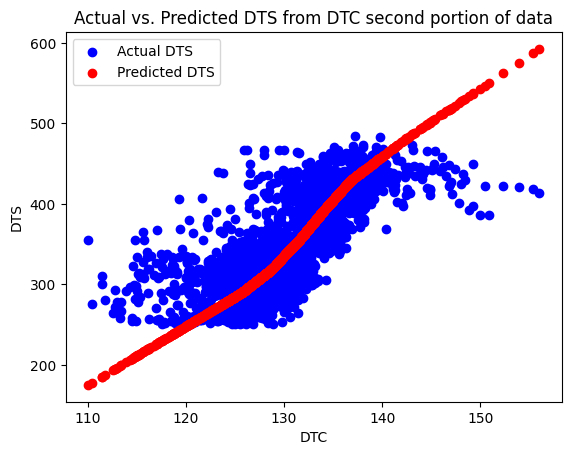

In [99]:
# plot training data for second portion of data using NN
plt.scatter(X2, y2, label = "Actual DTS", color = "blue")

# plot predicted data from second portion of data, predicted using NN model
plt.scatter(X2, train_pred2, label = "Predicted DTS", color = "red")
plt.xlabel("DTC")
plt.ylabel("DTS")
plt.title("Actual vs. Predicted DTS from DTC second portion of data")
plt.legend()

## MLP (Multi-Layer Perceptron) Regressor on Neural Network

In [100]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import RobustScaler

In [101]:
# scaling
X = train[['DTC']]
y = train[['DTS']]
X2 = train2[['DTC']]
y2 = train2[['DTS']]

# robust scaler from sklearn for first portion of data
xscaler = RobustScaler()
xscaler.fit(X)
Xs = xscaler.transform(X)

yscaler = RobustScaler()
yscaler.fit(y)
ys = yscaler.transform(y)

# scaling
X2 = train2[['DTC']]
y2 = train2[['DTS']]

# robust scaler from sklearn for second portion of data
xscaler2 = RobustScaler()
xscaler2.fit(X2)
Xs2 = xscaler2.transform(X2)

yscaler2 = RobustScaler()
yscaler2.fit(y2)
ys2 = yscaler2.transform(y2)

#scale the test set
X_test = test[['DTC']]
y_test = test[['DTS']]
X_test2 = test2[['DTC']]
y_test2 = test2[['DTS']]

# robust scaler from sklearn for first portion of data
xtscaler = RobustScaler()
xtscaler.fit(X_test)
Xs_test = xtscaler.transform(X_test)

ytscaler = RobustScaler()
ytscaler.fit(y_test)
ys_test = ytscaler.transform(y_test)

# robust scaler from sklearn for second portion of data
xtscaler2 = RobustScaler()
xtscaler2.fit(X_test2)
Xs2_test = xtscaler2.transform(X_test2)

ytscaler2 = RobustScaler()
ytscaler2.fit(y_test2)
ys2_test = ytscaler2.transform(y_test2)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


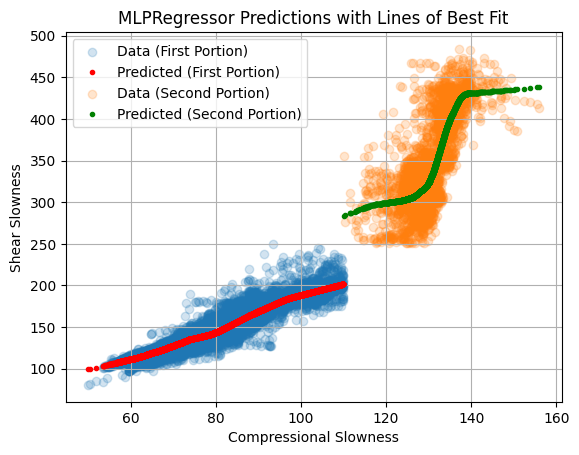

In [102]:
# fit MLPRegressor for first and second portion of data
mlp = MLPRegressor(hidden_layer_sizes = (24, 12), max_iter=500).fit(Xs, ys)
mlp2 = MLPRegressor(hidden_layer_sizes = (24, 12), max_iter=500).fit(Xs2, ys2)

#make predictions
pred = ytscaler.inverse_transform(np.expand_dims(mlp.predict(Xs_test),-1))

pred2 = ytscaler2.inverse_transform(np.expand_dims(mlp2.predict(Xs2_test),-1))

#Create scatter plot
plt.scatter(X, y, alpha=0.2, label='Data (First Portion)')

# Predicted values for data with outliers (assuming mlp.predict returns a 1D array)
predicted_DTS = ytscaler.inverse_transform(np.expand_dims(mlp.predict(xtscaler.transform(train[['DTC']])),-1))
plt.plot(train.DTC, predicted_DTS, '.r', label='Predicted (First Portion)')

# Second Portion of Data
plt.scatter(train2.DTC, train2.DTS, alpha=0.2, label='Data (Second Portion)')

# Predicted values for data without outliers
predicted_DTS2 = ytscaler2.inverse_transform(np.expand_dims(mlp2.predict(xtscaler2.transform(train2[['DTC']])),-1))
plt.plot(train2.DTC, predicted_DTS2, '.g', label='Predicted (Second Portion)')

# Customize the plot
plt.xlabel('Compressional Slowness')
plt.ylabel('Shear Slowness')
plt.title('MLPRegressor Predictions with Lines of Best Fit')
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.show()

In [104]:
test_rmse = math.sqrt(mean_squared_error(test[['DTS']], pred))
test_rmse2 = math.sqrt(mean_squared_error(test2[['DTS']], pred2))

print('\nMLP Regressor Prediction Error for First Portion of Data')
print("RMSE:", test_rmse)
print('\nMLP Regressor Prediction Error for Second Portion of Data')
print("RMSE:", test_rmse2)


MLP Regressor Prediction Error for First Portion of Data
RMSE: 8.254726596749308

MLP Regressor Prediction Error for Second Portion of Data
RMSE: 32.26887916891879
